In [ ]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime

start=datetime.now()

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=28*28*3, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               301184    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 302,474
Trainable params: 302,474
Non-trainable params: 0
_________________________________________________________________


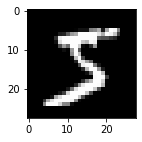

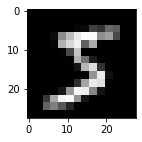

channel (28, 28, 3)


In [ ]:
# 怎樣處理
from skimage import segmentation
from skimage.color import label2rgb

segments = segmentation.slic(X_train[0], start_label = 1, n_segments=300)
mnist_segments = label2rgb(label=segments, image=X_train[0], kind='avg', bg_label=None)
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(mnist_segments.astype('int32'))
plt.show()
print('channel', mnist_segments.shape)

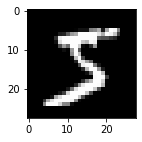

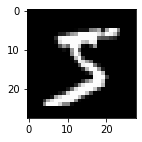

(28, 28, 3)

In [ ]:
# 怎樣處理
from skimage import segmentation
from skimage.color import label2rgb

def segment(x, n=300):
    segments = segmentation.slic(x, start_label = 1, n_segments=n)
    mnist_segments = label2rgb(label=segments, image=x, kind='avg', bg_label=None).astype('int32')
    
    return(mnist_segments)
# 驗證
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(segment(X_train[0], 500))
plt.show()
segment(X_train[0]).shape

In [ ]:
%%time
# 可以試試這樣做 僅是部分資料
from tqdm import tqdm # 跑出步近圖
import numpy as np
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import exposure
from skimage.transform import rescale
from skimage.util import random_noise

X_train_skimage = np.array([segment(x, n=500) for x in X_train[:]]) # <--核心價值 change me
X_test_skimage = np.array([segment(x, n=500) for x in X_test[:]])  # <--核心價值 change me
print('Preprocessed by skimage.segmentation')

Preprocessed by skimage.segmentation
Wall time: 8min 4s


In [ ]:
X_train_skimage.shape

(60000, 28, 28, 3)

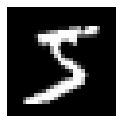

In [ ]:
# 劃出一 原來圖片
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

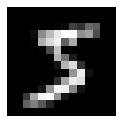

Data range after preprocessed 0 253


In [ ]:
# 劃出一圖片
plt.figure(figsize=(2,2))
plt.imshow(X_train_skimage[0], cmap='gray')
plt.axis('off')
plt.show()
print('Data range after preprocessed', X_train_skimage[0].min(), X_train_skimage[0].max())

In [ ]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train = X_train_skimage #<--------------preprocessed by skimage
X_test  = X_test_skimage  #<--------------preprocessed by skimage

X_train_2D = X_train.reshape(60000, 28*28*3).astype('float32')  #< -----
X_test_2D = X_test.reshape(10000, 28*28*3).astype('float32')    #< -----

x_Train_norm = X_train_2D # /255.0  #<-------取消
x_Test_norm = X_test_2D   # /255.0  #<-------取消

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, epochs=40, 
                          batch_size=800, verbose=2)  

Epoch 1/40
60/60 - 4s - loss: 8.2198 - accuracy: 0.8097 - val_loss: 1.3927 - val_accuracy: 0.9070
Epoch 2/40
60/60 - 1s - loss: 0.9877 - accuracy: 0.9107 - val_loss: 0.7794 - val_accuracy: 0.9176
Epoch 3/40
60/60 - 1s - loss: 0.5743 - accuracy: 0.9256 - val_loss: 0.5911 - val_accuracy: 0.9209
Epoch 4/40
60/60 - 1s - loss: 0.3837 - accuracy: 0.9384 - val_loss: 0.4854 - val_accuracy: 0.9295
Epoch 5/40
60/60 - 1s - loss: 0.3000 - accuracy: 0.9446 - val_loss: 0.4165 - val_accuracy: 0.9382
Epoch 6/40
60/60 - 1s - loss: 0.2312 - accuracy: 0.9522 - val_loss: 0.3675 - val_accuracy: 0.9391
Epoch 7/40
60/60 - 2s - loss: 0.1888 - accuracy: 0.9582 - val_loss: 0.3282 - val_accuracy: 0.9445
Epoch 8/40
60/60 - 1s - loss: 0.1552 - accuracy: 0.9629 - val_loss: 0.3158 - val_accuracy: 0.9441
Epoch 9/40
60/60 - 1s - loss: 0.1315 - accuracy: 0.9668 - val_loss: 0.3077 - val_accuracy: 0.9479
Epoch 10/40
60/60 - 4s - loss: 0.1149 - accuracy: 0.9699 - val_loss: 0.2925 - val_accuracy: 0.9492
Epoch 11/40
60/60 -

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 3s 10ms/step - loss: 0.2880 - accuracy: 0.9617

	[Info] Accuracy of testing data = 96.2%


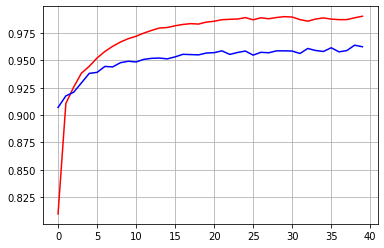

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

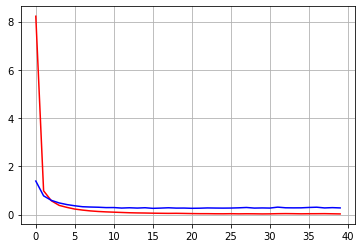

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()